In [1]:
# load pandas to read data into dataframe
import pandas as pd

df = pd.read_csv("/content/electronics_reviews.csv")
df.head() #get a snippet of the data

,review_text,sentiment,product_category,feature_mentioned,rating
0,Best tablet I've used in a while. The battery ...,positive,tablet,battery,5
1,It’s a usable smartphone. The battery life mee...,neutral,smartphone,battery life,2
2,It’s a usable camera. The image quality meets ...,neutral,camera,image quality,3
3,Very happy with my new headphones. Highly reco...,positive,headphones,sound quality,4
4,Decent tablet. It gets the job done though the...,neutral,tablet,display,2


In [2]:
# check for distinct sentiments
df['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [3]:
# import Hugging Face pipeline for LLM selection
from transformers import pipeline

#chose the roberta-base model since the sentiments are in 3 classes
zero_shot_model = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
# a dictionary that points each sentiment label to a numeral
# 'negative': 0, 'neutral': 1, 'positive': 2
label_map = {'LABEL_0': 0, 'LABEL_1': 1, 'LABEL_2': 2}

In [59]:
from tqdm import tqdm # import tqdm which will provide progress bars

# test the roberta-base model on the reviews
preds = [label_map[zero_shot_model(text)[0]['label']] for text in tqdm(df['review_text'])]

100%|██████████| 9999/9999 [01:40<00:00, 99.18it/s] 


In [60]:
# view the roberta-base model initial predictions
print(preds)

[2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 

In [61]:
# create a dictionary for the numerical labels for each actual unique sentiment
label_int = {'negative': 0, 'neutral': 1, 'positive': 2}
# add a new column, label, and map the integer value for each sentiment
df['label'] = df['sentiment'].map(label_int)

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3333
     Neutral       1.00      0.05      0.09      3333
    Positive       0.51      1.00      0.68      3333

    accuracy                           0.68      9999
   macro avg       0.84      0.68      0.59      9999
weighted avg       0.84      0.68      0.59      9999



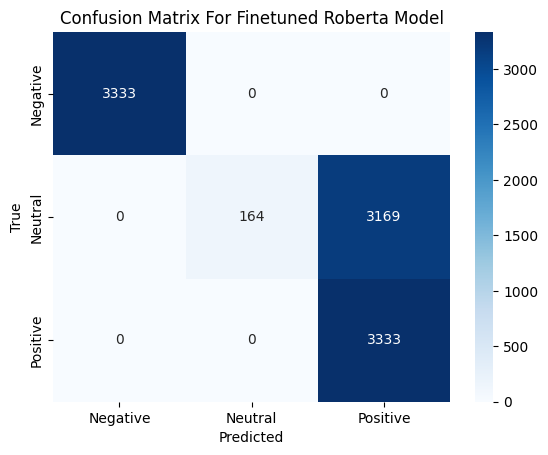

In [63]:
# import accuracy evaluation metrics from sklearn
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df['label'], preds, target_names=["Negative", "Neutral", "Positive"]))

cm = confusion_matrix(df['label'], preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Finetuned Roberta Model')
import os
os.makedirs("./plots", exist_ok=True)
plt.savefig("./plots/Roberta_base_model_confusion_matrix_on_whole_dataset.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()

In [9]:
print(confusion_matrix(df['label'], preds))

[[3333    0    0]
 [   0  164 3169]
 [   0    0 3333]]


No false positives for negative and positive reviews.
However, out of 3,333 neutral reviews, only 164 were correctly predicted as neutral.

In [10]:
# Add predictions to dataFrame
df['pred'] = preds

# Filter misclassified reviews
errors = df[df['label'] != df['pred']]

# Show top 10 error cases
sample_errors = errors[['review_text', 'label', 'pred']].sample(10, random_state=42)
print(sample_errors.to_string(index=False))

                                                                                     review_text  label  pred
         This headphones is alright. If you don’t expect much from the sound quality, it’s fine.      1     2
                       The tablet works fine. The response time is okay but nothing exceptional.      1     2
                                It’s a usable smartphone. The screen meets minimum expectations.      1     2
                This smartphone is alright. If you don’t expect much from the camera, it’s fine.      1     2
          This headphones is alright. If you don’t expect much from the connectivity, it’s fine.      1     2
                         Decent tablet. It gets the job done though the battery could be better.      1     2
     An average experience with this smartwatch. Not bad, not great — the battery is acceptable.      1     2
An average experience with this smartphone. Not bad, not great — the battery life is acceptable.      1     2
          

The base model struggles with neutral reviews.

In [11]:
# FINETUNING

In [12]:
# Importing the libraries needed
from sklearn.model_selection import train_test_split
import logging
logging.basicConfig(level=logging.ERROR)

In [13]:
# Set up device for GPU usage
#from torch import cuda
#device = 'cuda' if cuda.is_available() else 'cpu'

In [14]:
# select only necessary columns for training the base model
data = df[["review_text", "sentiment", "label"]]

In [15]:
data.head()

,review_text,sentiment,label
0,Best tablet I've used in a while. The battery ...,positive,2
1,It’s a usable smartphone. The battery life mee...,neutral,1
2,It’s a usable camera. The image quality meets ...,neutral,1
3,Very happy with my new headphones. Highly reco...,positive,2
4,Decent tablet. It gets the job done though the...,neutral,1


In [16]:
# check distribution of the reviews:
data['sentiment'].value_counts()

,count
sentiment,
positive,3333
neutral,3333
negative,3333


All sentiment classes are equally distributed so no concern about under or oversampled categories.

In [17]:
data.shape

(9999, 3)

In [18]:
# split data into training and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(data['review_text'], data['label'], test_size=0.2, random_state=42)


In [20]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from torch.utils.data import Dataset

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
#model.cpu()

# tokenize text
def tokenize_data(texts, labels):
    return tokenizer(list(texts), padding=True, truncation=True, return_tensors="pt"), list(labels)

train_encodings, train_labels = tokenize_data(train_texts, train_labels)
val_encodings, val_labels = tokenize_data(val_texts, val_labels)

# Dataset wrappers
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tonycyril0 (tonycyril0-jomo-kenyatta-university-of-agriculture-and-t) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.213800
1000,0.000100
1500,0.000100
2000,0.000000
2500,0.000000
3000,0.000000


TrainOutput(global_step=3000, training_loss=0.03567746566856901, metrics={'train_runtime': 396.7025, 'train_samples_per_second': 60.491, 'train_steps_per_second': 7.562, 'total_flos': 332961293947086.0, 'train_loss': 0.03567746566856901, 'epoch': 3.0})

In [21]:
# Evaluate
trainer.evaluate()

{'eval_loss': 1.2392921235004906e-05,
 'eval_runtime': 4.0387,
 'eval_samples_per_second': 495.21,
 'eval_steps_per_second': 61.901,
 'epoch': 3.0}

In [22]:
trainer.state.log_history  # View logs

[{'loss': 0.2138,
  'grad_norm': 0.003594933543354273,
  'learning_rate': 4.99e-05,
  'epoch': 0.5,
  'step': 500},
 {'loss': 0.0001,
  'grad_norm': 0.0014076196821406484,
  'learning_rate': 4.002e-05,
  'epoch': 1.0,
  'step': 1000},
 {'loss': 0.0001,
  'grad_norm': 0.0007603258709423244,
  'learning_rate': 3.0020000000000004e-05,
  'epoch': 1.5,
  'step': 1500},
 {'loss': 0.0,
  'grad_norm': 0.0005903483834117651,
  'learning_rate': 2.002e-05,
  'epoch': 2.0,
  'step': 2000},
 {'loss': 0.0,
  'grad_norm': 0.00046600386849604547,
  'learning_rate': 1.002e-05,
  'epoch': 2.5,
  'step': 2500},
 {'loss': 0.0,
  'grad_norm': 0.0005154379759915173,
  'learning_rate': 2e-08,
  'epoch': 3.0,
  'step': 3000},
 {'train_runtime': 396.7025,
  'train_samples_per_second': 60.491,
  'train_steps_per_second': 7.562,
  'total_flos': 332961293947086.0,
  'train_loss': 0.03567746566856901,
  'epoch': 3.0,
  'step': 3000},
 {'eval_loss': 1.2392921235004906e-05,
  'eval_runtime': 4.0387,
  'eval_samples_

In [71]:
# Save log history to a .txt file
with open("./logs/training_logs.txt", "w") as f:
    for entry in trainer.state.log_history:
        f.write(str(entry) + "\n")

In [23]:
import matplotlib.pyplot as plt

In [24]:
logs = pd.DataFrame(trainer.state.log_history)

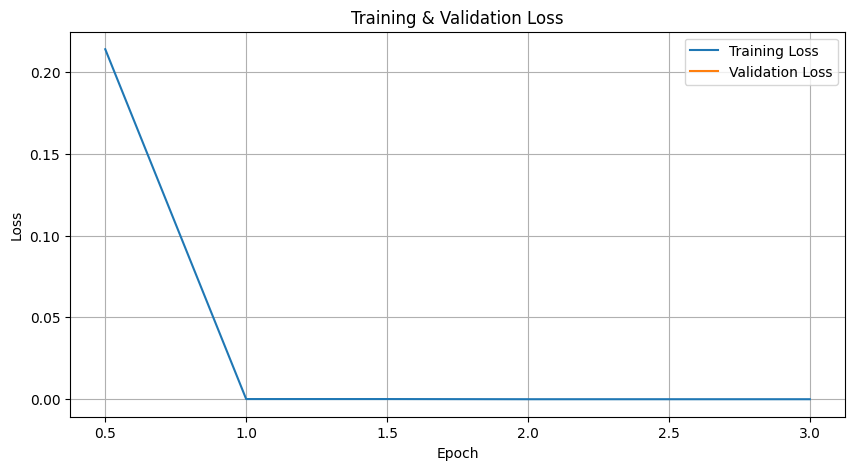

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(logs['epoch'], logs['loss'], label='Training Loss')

if 'eval_loss' in logs.columns:
    plt.plot(logs['epoch'], logs['eval_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig("./plots/training_and_validation_loss_plot.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
trainer.save_model('/content/drive/MyDrive/finetuned_model1')

In [44]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get predictions
predictions = trainer.predict(val_dataset)
preds1 = np.argmax(predictions.predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(predictions.label_ids, preds1)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 1.0000


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       621
     Neutral       1.00      1.00      1.00       672
    Positive       1.00      1.00      1.00       707

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



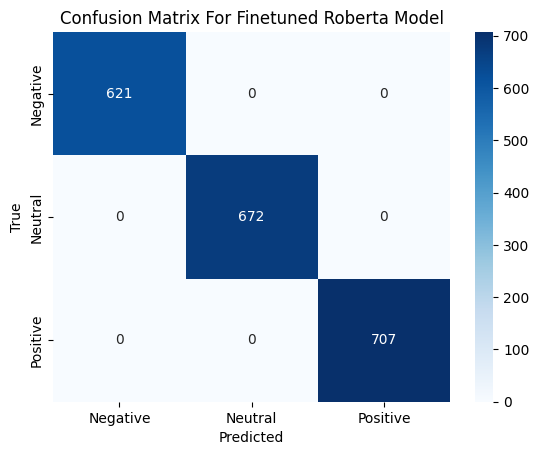

In [68]:
# confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(predictions.label_ids, preds1, target_names=['Negative', 'Neutral', 'Positive']))

cm1 = confusion_matrix(predictions.label_ids, preds1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Finetuned Roberta Model')
plt.savefig("./plots/Confusion_Matrix_For_Finetuned_Roberta_Model.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


In [42]:
# test the roberta-base model on the validation dataset
preds2 = [label_map[zero_shot_model(text)[0]['label']] for text in tqdm(val_texts)]

100%|██████████| 2000/2000 [00:20<00:00, 98.02it/s]


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       621
     Neutral       1.00      0.04      0.08       672
    Positive       0.52      1.00      0.69       707

    accuracy                           0.68      2000
   macro avg       0.84      0.68      0.59      2000
weighted avg       0.83      0.68      0.58      2000



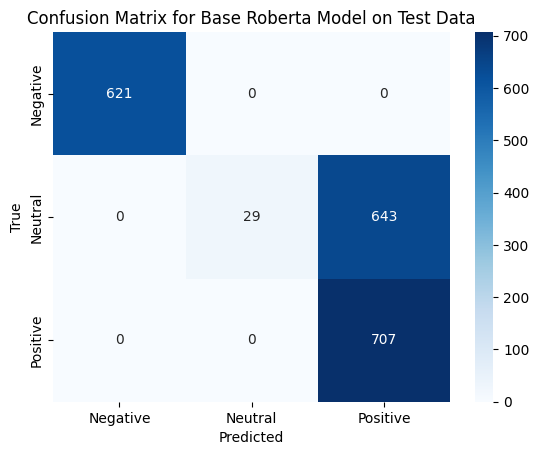

In [69]:
# classification report
print(classification_report(val_labels, preds2, target_names=["Negative", "Neutral", "Positive"]))

cm2 = confusion_matrix(predictions.label_ids, preds2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Base Roberta Model on Test Data')
plt.savefig("./plots/Confusion_Matrix_For_base_Roberta_Model_on_test_data.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


In [46]:
# test statistical improvement of finetuned roberta model using McNemar's Test
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

y_true = val_labels
y_pred_base = preds2
y_pred_finetuned = preds1

# Create a 2x2 contingency table:
# b: base wrong, finetuned correct
# c: base correct, finetuned wrong
b = c = 0
for yt, yb, yf in zip(y_true, y_pred_base, y_pred_finetuned):
    if yb != yt and yf == yt:
        b += 1
    elif yb == yt and yf != yt:
        c += 1

table = [[0, b],
         [c, 0]]

result = mcnemar(table, exact=True)
print(f"McNemar's Test p-value: {result.pvalue:.5f}")


McNemar's Test p-value: 0.00000


  True Label Predicted Label  Zero-Shot  Base Model  Fine-Tuned
0   Negative        Negative        621         621         621
1   Negative         Neutral          0           0           0
2   Negative        Positive          0           0           0
3    Neutral        Negative          0           0           0
4    Neutral         Neutral         29         672          29
5    Neutral        Positive        643           0         643
6   Positive        Negative          0           0           0
7   Positive         Neutral          0           0           0
8   Positive        Positive        707         707         707
